In [1]:
import os
os.chdir(f'{os.getcwd()}/..')

In [2]:
import torch
import matplotlib.pyplot as plt
from model.pointconv import PointAR
from evaluation.utils import SphericalHarmonics
from datasets.pointar.loader import PointARTestDataset

In [3]:
dataset = PointARTestDataset()

In [4]:
epoch = 13
model = PointAR.load_from_checkpoint(f'./dist/model_dumps/{epoch}.ckpt')
model.eval()

PointAR(
  (sa1): PointConvDensitySetAbstraction(
    (mlp_convs): ModuleList(
      (0): Conv2d(6, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    )
    (mlp_bns): ModuleList(
      (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (weightnet): WeightNet(
      (mlp_convs): ModuleList(
        (0): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1))
        (1): Conv2d(8, 8, kernel_size=(1, 1), stride=(1, 1))
        (2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
      )
      (mlp_bns): ModuleList(
        (0): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (l

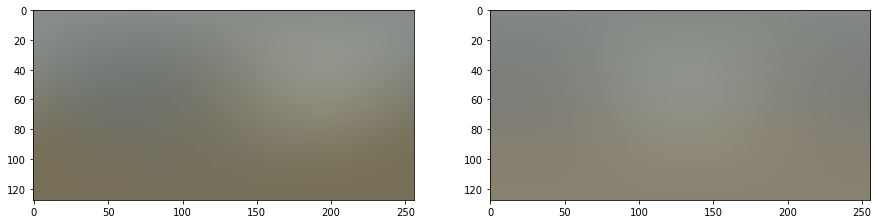

In [11]:
idx = 29

n_scale = torch.Tensor(model.hparams['scale'])
n_min = torch.Tensor(model.hparams['min'])

x, y = dataset[idx]
xyz, rgb = x

shc_gt = y
shc_pd = model.forward(torch.unsqueeze(xyz, dim=0), torch.unsqueeze(rgb, dim=0))
shc_pd = (shc_pd - n_min) / n_scale

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(SphericalHarmonics.from_array(shc_gt.numpy()).reconstruct_to_canvas().data)
ax[1].imshow(SphericalHarmonics.from_array(shc_pd.detach().numpy()[0]).reconstruct_to_canvas().data)